<a href="https://colab.research.google.com/github/HC-JEONG/Introduction_to_Machine_Learning_with_Python/blob/master/Ch2%201~3%20Supervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 지도 학습

> 지도 학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다. 이런 입/출력 샘플 데이터, 즉 training set으로부터 머신러닝 모델을 만든다. 목표는 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이다.

# 2.1 분류와 회귀

> 지도학습에는 **분류(classification)**와 **회귀(regression)**가 있다.

*   **분류**는 미리 정의된, 가능성 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것이다.
*   **회귀**는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수(수학 용어로는 실수)를 예측하는 것이다.

> 출력 값에 연속성이 있는지 비교해보면 회귀와 분류 문제를 쉽게 구분 할 수 있다.


# 2.2 일반화, 과대적합, 과소적합

> 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 **일반화**(generalization)되었다고 한다.

> 알고리즘이 새로운 데이터도 잘 처리하는지 측정하는 방법은 test set으로 평가해보는 것밖에 없다.



*   가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 **과대적합(overfitting)**이라고 한다.
*   너무 간단한 모델이 선택되는 것을 **과소적합(underfitting)**이라고 한다.


## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

> 데이터셋에서 다양한 개체(행 갯수)가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.

개체를 더 많이 모으는 것이 다양성을 키워주므로 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 해준다. 그러나 같은 개체를 중복하거나 매우 비슷한 개체를 모으는 것은 도움이 되지 않는다.


# 2.3 지도 학습 알고리즘



## 2.3.1 예제에 사용할 데이터셋

두 개의 특성을 가진 forge dataset은 인위적으로 만든 이진 분류 데이터셋이다.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
import pandas as pd
!pip install mglearn
import mglearn
import scipy as sp
import sklearn
import graphviz
from IPython.display import display
from sklearn.pipeline import make_pipeline
from google.colab import files
import io

!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

fm._rebuild()

     |████████████████████████████████| 542kB 3.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582706 sha256=eedab391f66cb37b1b003497d762fd0de002f5b710215dc546a7c78d3f792934
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Selecting previously unselected package fonts-nanum.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic Eco


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


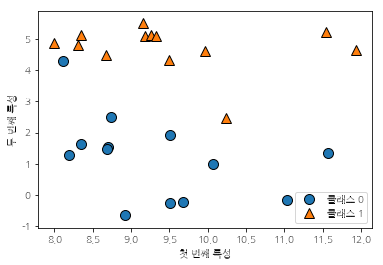

In [0]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

X.shape 값을 통해 이 데이터셋은 26개의 개체와 특성(attribute, feature) 2개를 가진다는 것을 알 수 있다.

wave dataset은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)를 가진다.

Text(0, 0.5, '타깃')

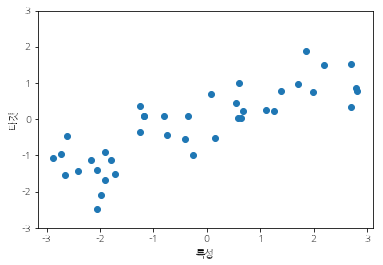

In [0]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

특성을 x축에 놓고 회귀의 target(label)을 y축에 놓았다.

> 인위적인 소규모 dataset 외에 scikit-learn에 들어 있는 실제 dataset도 두 개를 사용할 것이다. 하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암(Wisconsin Breast Cancer) dataset이다.

In [0]:
# 분류용 유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


569개의 개체를 가지고 있고 특성은 30개다.

In [0]:
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


212개는 악성이고 357개는 양성이다.

feature_names를 확인하면 각 특성의 의미를 알 수 있다.

In [0]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


회귀 분석용 실제 dataset으로는 보스턴 주택가격(Boston Housing)이다.

In [0]:
# 회귀용 보스턴 주택가격 데이터
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


13개의 입력 특성뿐 아니라 특성끼리 곱하여 의도적으로 확장한다.

In [0]:
X,y=mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)
